In [79]:
import xarray
import matplotlib.pyplot as mp
import cartopy
import matplotlib.patches
import matplotlib.patheffects

In [8]:
root = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/nested_FMAASO_10days/400/001/'

open example files for d01, d02, d03

In [31]:
d01_filename = 'wrfout_d01_1979-01-01_00:00:00'
d02_filename = 'wrfout_d02_1979-01-01_00:00:00'
d03_filename = 'wrfout_d03_1979-01-01_00:00:00'

In [32]:
d01_ds = xarray.open_dataset(root+d01_filename)
d02_ds = xarray.open_dataset(root+d02_filename)
d03_ds = xarray.open_dataset(root+d03_filename)

In [33]:
XLAT_d01 = d01_ds['XLAT'].values
XLONG_d01 = d01_ds['XLONG'].values

XLAT_d02 = d02_ds['XLAT'].values
XLONG_d02 = d02_ds['XLONG'].values

XLAT_d03 = d03_ds['XLAT'].values
XLONG_d03 = d03_ds['XLONG'].values

In [34]:
latmin_d01 = XLAT_d01.min()
latmax_d01 = XLAT_d01.max()

latmin_d02 = XLAT_d02.min()
latmax_d02 = XLAT_d02.max()

latmin_d03 = XLAT_d03.min()
latmax_d03 = XLAT_d03.max()

In [40]:
lonmin_d01 = XLONG_d01.min()+360.
lonmax_d01 = XLONG_d01.max()+360.

lonmin_d02 = XLONG_d02.min()+360.
lonmax_d02 = XLONG_d02.max()+360.

lonmin_d03 = XLONG_d03.min()+360.
lonmax_d03 = XLONG_d03.max()+360.

In [36]:
d01_height = latmax_d01-latmin_d01
d02_height = latmax_d02-latmin_d02
d03_height = latmax_d03-latmin_d03

In [43]:
d01_width = lonmax_d01-lonmin_d01
d02_width = lonmax_d02-lonmin_d02
d03_width = lonmax_d03-lonmin_d03

In [90]:
latmin_d03

-2.243599

In [91]:
latmax_d03

12.03965

In [41]:
lonmin_d03

277.7049255371094

In [42]:
lonmax_d03

313.6654510498047

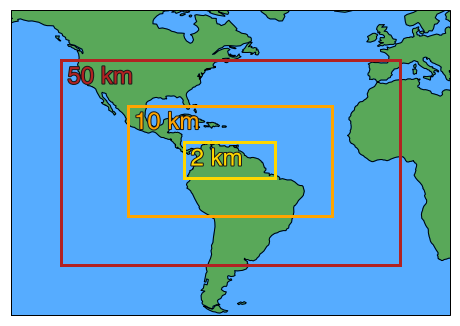

In [89]:
fontsize = 24

fig = mp.figure(figsize=(6.5,5))

map_proj = cartopy.crs.PlateCarree()
#map_proj = cartopy.crs.Mercator(central_longitude=-64.0, min_latitude=latmin_d01, max_latitude=latmax_d01, globe=None, latitude_true_scale=5.25)
#data_proj = cartopy.crs.Mercator(central_longitude=0.0, min_latitude=-80.0, max_latitude=84.0, globe=None, latitude_true_scale=0.0)

ax = fig.add_subplot(111, projection=map_proj)
ax.set_extent([lonmin_d01-20,lonmax_d01+20,latmin_d01-20,latmax_d01+20], crs=map_proj)


ax.add_feature(cartopy.feature.LAND, color='forestgreen', alpha=0.75)
ax.add_feature(cartopy.feature.OCEAN, color='dodgerblue', alpha=0.75)


ax.add_patch(matplotlib.patches.Rectangle(xy=[lonmin_d01, latmin_d01], width=d01_width, height=d01_height,
                                facecolor='none',
                                edgecolor='firebrick',\
                                linewidth=3,\
                                transform=map_proj, zorder=2) )


ax.add_patch(matplotlib.patches.Rectangle(xy=[lonmin_d02, latmin_d02], width=d02_width, height=d02_height,
                                facecolor='none',
                                edgecolor='orange',\
                                linewidth=3,\
                                transform=map_proj, zorder=2) )


ax.add_patch(matplotlib.patches.Rectangle(xy=[lonmin_d03, latmin_d03], width=d03_width, height=d03_height,
                                facecolor='none',
                                edgecolor='gold',\
                                linewidth=3,\
                                transform=map_proj, zorder=2) )

text1 = ax.text(s='50 km', x=lonmin_d01+2.5, y=latmax_d01-2.5, ha='left', va='top', color='firebrick', fontsize=fontsize, transform=map_proj)
text2 = ax.text(s='10 km', x=lonmin_d02+2.5, y=latmax_d02-2.5, ha='left', va='top', color='orange', fontsize=fontsize, transform=map_proj)
text3 = ax.text(s='2 km', x=lonmin_d03+2.5, y=latmax_d03-2.5, ha='left', va='top', color='gold', fontsize=fontsize, transform=map_proj)

text1.set_path_effects([matplotlib.patheffects.Stroke(linewidth=2, foreground='0.1'), matplotlib.patheffects.Normal()])
text2.set_path_effects([matplotlib.patheffects.Stroke(linewidth=2, foreground='0.1'), matplotlib.patheffects.Normal()])
text3.set_path_effects([matplotlib.patheffects.Stroke(linewidth=2, foreground='0.1'), matplotlib.patheffects.Normal()])

ax.coastlines()

fig.tight_layout()
fig.savefig('manuscript_fig_S1_nested_domains.png', dpi=600, bbox_inches='tight')